In [21]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [22]:
# Create a reference the CSV file desired
csv_path = Path("la_data.csv")

# Read the CSV into a Pandas DataFrame
la_data = pd.read_csv(csv_path, low_memory=False)

la_data.tail()

,Division Number,Report Date,Occurence Date,Precinct,Reporting District,Crime Code,Crime Description,Modus Operandi,Victime Age,Victim Sex,...,Weapon Description,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Location,Latitude,longitude,Month/Year
852945,231606525,2023-03-22,2023-03-22 10:00:00,Foothill,1602,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,230.0,Unknown,Unknown,Unknown,12800 FILMORE ST,34.2790,-118.4116,2023-03-01
852946,231210064,2023-04-12,2023-04-12 16:30:00,77th Street,1239,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,...,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,230.0,Unknown,Unknown,Unknown,6100 S VERMONT AV,33.9841,-118.2915,2023-04-01
852947,230115220,2023-07-02,2023-07-01 00:01:00,Central,154,352,PICKPOCKET,1822 0344,24,F,...,Unknown,Invest Cont,352.0,Unknown,Unknown,Unknown,500 S MAIN ST,34.0467,-118.2485,2023-07-01
852948,230906458,2023-03-05,2023-03-05 09:00:00,Van Nuys,914,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,53,F,...,Unknown,Invest Cont,745.0,Unknown,Unknown,Unknown,14500 HARTLAND ST,34.1951,-118.4487,2023-03-01
852949,230319786,2023-11-10,2023-11-09 23:00:00,Southwest,395,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,1822 1606 0344 0385 1300,38,M,...,Unknown,Invest Cont,331.0,Unknown,Unknown,Unknown,4100 S HOBART BL,34.0091,-118.3078,2023-11-01


In [23]:
la_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Division Number      852950 non-null  int64  
 1   Report Date          852950 non-null  object 
 2   Occurence Date       852950 non-null  object 
 3   Precinct             852950 non-null  object 
 4   Reporting District   852950 non-null  int64  
 5   Crime Code           852950 non-null  int64  
 6   Crime Description    852950 non-null  object 
 7   Modus Operandi       852950 non-null  object 
 8   Victime Age          852950 non-null  int64  
 9   Victim Sex           852950 non-null  object 
 10  Victime Descent      852950 non-null  object 
 11  Premise Description  852950 non-null  object 
 12  Weapon Description   852950 non-null  object 
 13  Status Description   852950 non-null  object 
 14  Crime Code 1         852950 non-null  object 
 15  Crime Code 2     

In [24]:
la_data["Report Date"] = pd.to_datetime(la_data["Report Date"])
la_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Division Number      852950 non-null  int64         
 1   Report Date          852950 non-null  datetime64[ns]
 2   Occurence Date       852950 non-null  object        
 3   Precinct             852950 non-null  object        
 4   Reporting District   852950 non-null  int64         
 5   Crime Code           852950 non-null  int64         
 6   Crime Description    852950 non-null  object        
 7   Modus Operandi       852950 non-null  object        
 8   Victime Age          852950 non-null  int64         
 9   Victim Sex           852950 non-null  object        
 10  Victime Descent      852950 non-null  object        
 11  Premise Description  852950 non-null  object        
 12  Weapon Description   852950 non-null  object        
 13  Status Descrip

In [25]:
crime_description_counts = la_data["Crime Description"].value_counts()
top_10_crimes = crime_description_counts.head(10)
print(top_10_crimes)

Crime Description
VEHICLE - STOLEN                                           91473
BATTERY - SIMPLE ASSAULT                                   67976
THEFT OF IDENTITY                                          53467
BURGLARY FROM VEHICLE                                      52611
BURGLARY                                                   51961
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    51826
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             48876
THEFT PLAIN - PETTY ($950 & UNDER)                         43402
INTIMATE PARTNER - SIMPLE ASSAULT                          42729
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32875
Name: count, dtype: int64


In [26]:
la_data_clean = la_data[["Report Date", "Crime Description"]].copy()
la_data_clean['Year'] = la_data_clean['Report Date'].dt.year
la_data_clean['Month'] = la_data_clean['Report Date'].dt.month
la_data_clean.head()

,Report Date,Crime Description,Year,Month
0,2020-01-08,BATTERY - SIMPLE ASSAULT,2020,1
1,2020-01-02,BATTERY - SIMPLE ASSAULT,2020,1
2,2020-04-14,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,2020,4
3,2020-01-01,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2020,1
4,2020-01-01,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2020,1


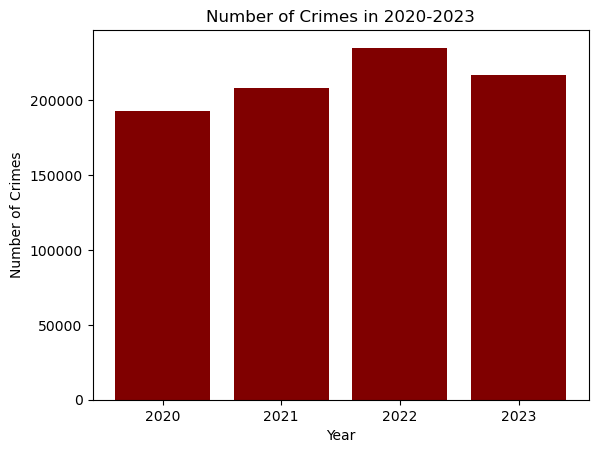

In [51]:
total = la_data_clean.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
total_df = total.groupby("Year").sum().reset_index()

plt.xticks([2020, 2021, 2022, 2023])

plt.bar(total_df['Year'].astype(int), total_df['Number of Crimes'], color='maroon')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes in 2020-2023')
plt.show()

In [52]:
total_df

,Year,Month,Number of Crimes
0,2020,78,192703
1,2021,78,208283
2,2022,78,235066
3,2023,78,216898


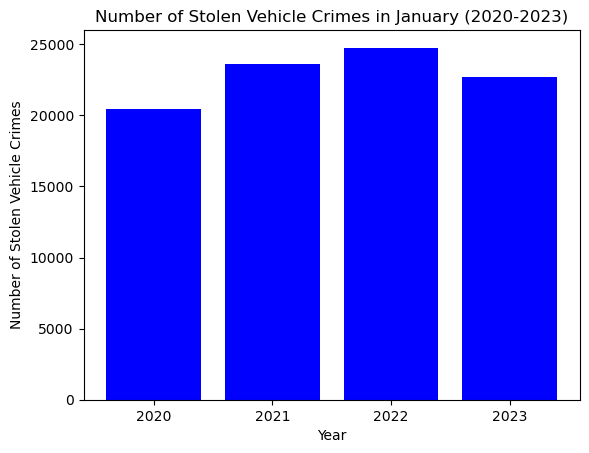

In [27]:
stolen_car = la_data_clean[la_data_clean["Crime Description"] == "VEHICLE - STOLEN"]
stolen_car_total = stolen_car.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
stolen_car_total = stolen_car_total.groupby("Year")["Number of Crimes"].sum().reset_index()

stolen_car_total = stolen_car_total[(stolen_car_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.xticks([2020, 2021, 2022, 2023])

# Plotting the bar chart
plt.bar(stolen_car_total['Year'].astype(int), stolen_car_total['Number of Crimes'], color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Stolen Vehicle Crimes')
plt.title('Number of Stolen Vehicle Crimes in January (2020-2023)')
plt.show()

In [28]:
stolen_car_total
#21.1% increase from 2020 - 2022
#8.4% decrease from 2022 - 2023

,Year,Number of Crimes
0,2020,20429
1,2021,23616
2,2022,24754
3,2023,22674


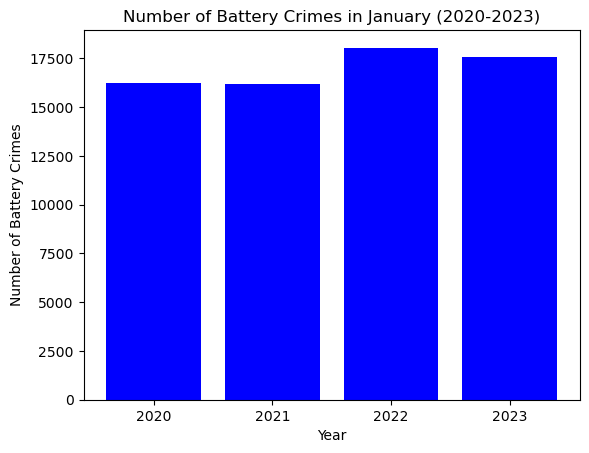

In [29]:
assault = la_data_clean[la_data_clean["Crime Description"] == "BATTERY - SIMPLE ASSAULT"]
assault_total = assault.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
assault_total = assault_total.groupby("Year")["Number of Crimes"].sum().reset_index()

assault_total = assault_total[(assault_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.xticks([2020, 2021, 2022, 2023])

# Plotting the bar chart
plt.bar(assault_total['Year'].astype(int), assault_total['Number of Crimes'], color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Battery Crimes')
plt.title('Number of Battery Crimes in January (2020-2023)')
plt.show()

In [30]:
assault_total
#11.1% increase 2020 - 2022
#2.6% decrease 2022 - 2023

,Year,Number of Crimes
0,2020,16230
1,2021,16155
2,2022,18038
3,2023,17553


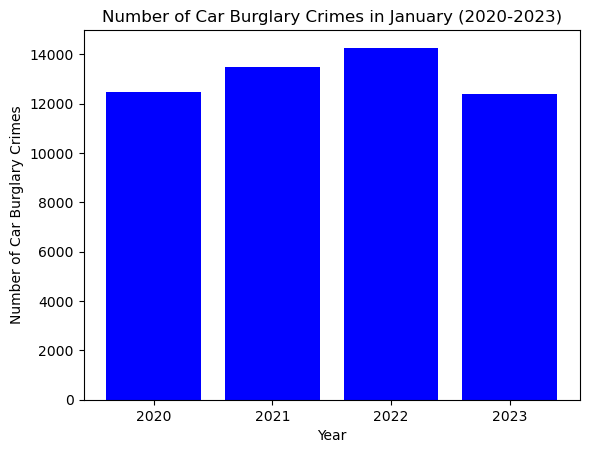

In [31]:
car_burg = la_data_clean[la_data_clean["Crime Description"] == "BURGLARY FROM VEHICLE"]
car_burg_total = car_burg.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
car_burg_total = car_burg_total.groupby("Year")["Number of Crimes"].sum().reset_index()

car_burg_total = car_burg_total[(car_burg_total['Year'].isin([2020, 2021, 2022, 2023]))]

# Plotting the bar chart
plt.bar(car_burg_total['Year'].astype(str), car_burg_total['Number of Crimes'], color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Car Burglary Crimes')
plt.title('Number of Car Burglary Crimes in January (2020-2023)')
plt.show()

In [32]:
car_burg_total
#14.2% increase 2020 - 2022
#13.1% decrease from 2022 - 2023

,Year,Number of Crimes
0,2020,12487
1,2021,13476
2,2022,14263
3,2023,12385


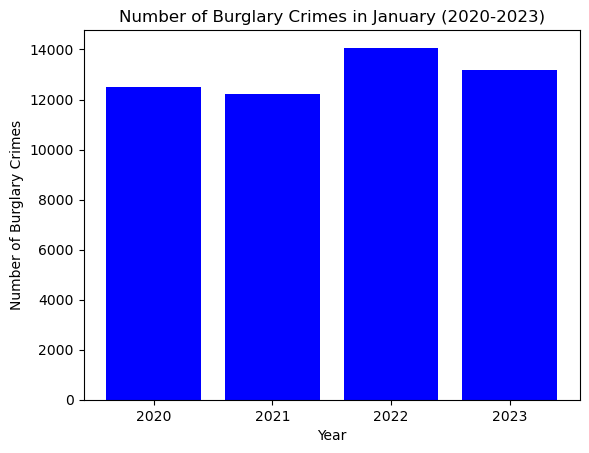

In [33]:
burg = la_data_clean[la_data_clean["Crime Description"] == "BURGLARY"]
burg_total = burg.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
burg_total = burg_total.groupby("Year")["Number of Crimes"].sum().reset_index()

burg_total = burg_total[(burg_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.xticks([2020, 2021, 2022, 2023])

# Plotting the bar chart
plt.bar(burg_total['Year'].astype(int), burg_total['Number of Crimes'], color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Burglary Crimes')
plt.title('Number of Burglary Crimes in January (2020-2023)')
plt.show()

In [34]:
burg_total
#12.7% incresae from 2020 to 2022
#6.4% decrease from 2022 - 2023

,Year,Number of Crimes
0,2020,12482
1,2021,12230
2,2022,14071
3,2023,13178


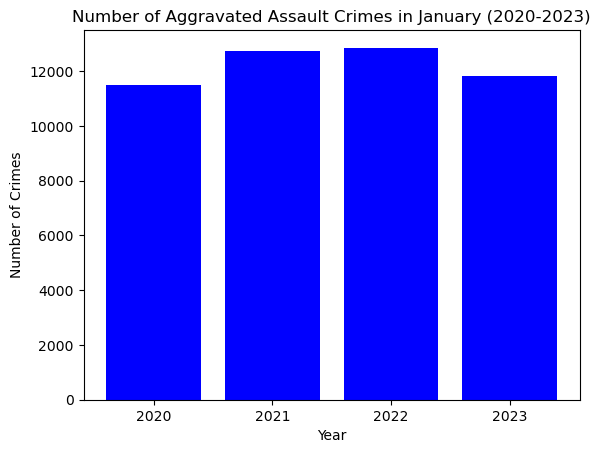

In [35]:
weapon_assault = la_data_clean[la_data_clean["Crime Description"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"]
weapon_assault_total = weapon_assault.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
weapon_assault_total = weapon_assault_total.groupby("Year")["Number of Crimes"].sum().reset_index()

weapon_assault_total = weapon_assault_total[(weapon_assault_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.xticks([2020, 2021, 2022, 2023])

# Plotting the bar chart
plt.bar(weapon_assault_total['Year'].astype(int), weapon_assault_total['Number of Crimes'], color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Aggravated Assault Crimes in January (2020-2023)')
plt.show()

In [36]:
weapon_assault_total
#11.8% increase from 2020 - 2022
#8% decrease from 2022 - 2023

,Year,Number of Crimes
0,2020,11488
1,2021,12718
2,2022,12853
3,2023,11817


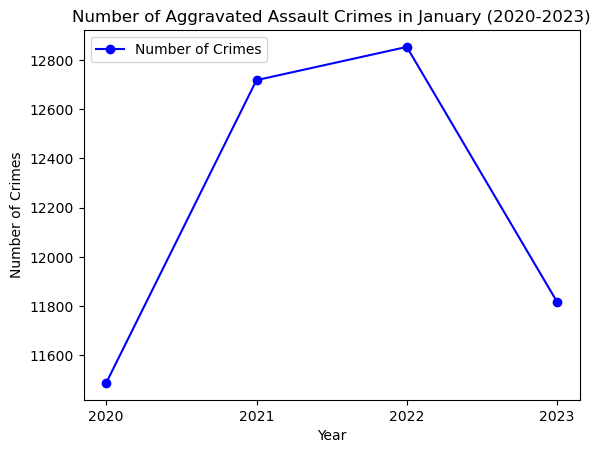

In [37]:
import matplotlib.pyplot as plt

weapon_assault = la_data_clean[la_data_clean["Crime Description"] == "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"]
weapon_assault_total = weapon_assault.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
weapon_assault_total = weapon_assault_total.groupby("Year")["Number of Crimes"].sum().reset_index()

weapon_assault_total = weapon_assault_total[(weapon_assault_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.xticks([2020, 2021, 2022, 2023])

# Plotting the line graph
plt.plot(weapon_assault_total['Year'].astype(int), weapon_assault_total['Number of Crimes'], marker='o', color='blue', label='Number of Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Aggravated Assault Crimes in January (2020-2023)')
plt.legend()  # Add a legend to label the line
plt.show()


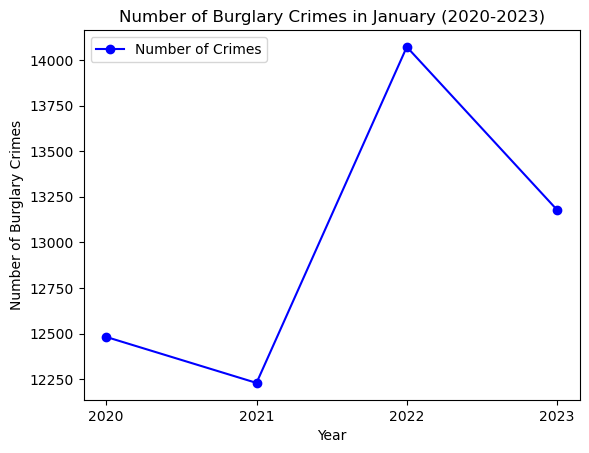

In [39]:
import matplotlib.pyplot as plt

burg = la_data_clean[la_data_clean["Crime Description"] == "BURGLARY"]
burg_total = burg.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
burg_total = burg_total.groupby("Year")["Number of Crimes"].sum().reset_index()

burg_total = burg_total[(burg_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.xticks([2020, 2021, 2022, 2023])

# Plotting the line graph
plt.plot(burg_total['Year'].astype(int), burg_total['Number of Crimes'], marker='o', color='blue', label='Number of Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Burglary Crimes')
plt.title('Number of Burglary Crimes in January (2020-2023)')
plt.legend()  # Add a legend to label the line
plt.show()


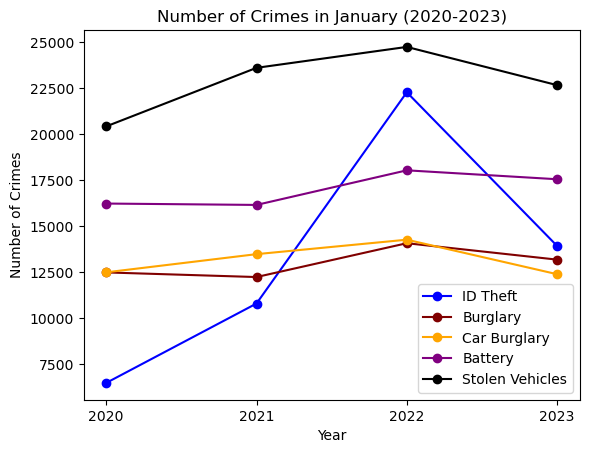

In [65]:
import matplotlib.pyplot as plt

# ID Theft Crimes
id_theft = la_data_clean[la_data_clean["Crime Description"] == "THEFT OF IDENTITY"]
id_theft_total = id_theft.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
id_theft_total = id_theft_total.groupby("Year")["Number of Crimes"].sum().reset_index()
id_theft_total = id_theft_total[(weapon_assault_total['Year'].isin([2020, 2021, 2022, 2023]))]
# Plotting the line graph for Aggravated Assault Crimes
plt.plot(id_theft_total['Year'].astype(int), id_theft_total['Number of Crimes'], marker='o', color='blue', label='ID Theft')

# Burglary Crimes
burg = la_data_clean[la_data_clean["Crime Description"] == "BURGLARY"]
burg_total = burg.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
burg_total = burg_total.groupby("Year")["Number of Crimes"].sum().reset_index()
burg_total = burg_total[(burg_total['Year'].isin([2020, 2021, 2022, 2023]))]
# Plotting the line graph for Burglary Crimes
plt.plot(burg_total['Year'].astype(int), burg_total['Number of Crimes'], marker='o', color='maroon', label='Burglary')

# Car Burglary Crimes
car_burg = la_data_clean[la_data_clean["Crime Description"] == "BURGLARY FROM VEHICLE"]
car_burg_total = car_burg.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
car_burg_total = car_burg_total.groupby("Year")["Number of Crimes"].sum().reset_index()
car_burg_total = car_burg_total[(car_burg_total['Year'].isin([2020, 2021, 2022, 2023]))]

# Plotting the line graph for Assault Crimes
plt.plot(car_burg_total['Year'].astype(int), car_burg_total['Number of Crimes'], marker='o', color='orange', label='Car Burglary')

#Assault Crimes
assault = la_data_clean[la_data_clean["Crime Description"] == "BATTERY - SIMPLE ASSAULT"]
assault_total = assault.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
assault_total = assault_total.groupby("Year")["Number of Crimes"].sum().reset_index()

assault_total = assault_total[(assault_total['Year'].isin([2020, 2021, 2022, 2023]))]

plt.plot(assault_total['Year'].astype(int), assault_total['Number of Crimes'], marker='o', color='purple', label='Battery')

#Stolen Car
stolen_car = la_data_clean[la_data_clean["Crime Description"] == "VEHICLE - STOLEN"]
stolen_car_total = stolen_car.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
stolen_car_total = stolen_car_total.groupby("Year")["Number of Crimes"].sum().reset_index()

stolen_car_total = stolen_car_total[(stolen_car_total['Year'].isin([2020, 2021, 2022, 2023]))]

plt.plot(stolen_car_total['Year'].astype(int), stolen_car_total['Number of Crimes'], marker='o', color='black', label='Stolen Vehicles')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes in January (2020-2023)')
plt.legend()  # Add a legend to label the lines
plt.xticks([2020, 2021, 2022, 2023])
plt.show()


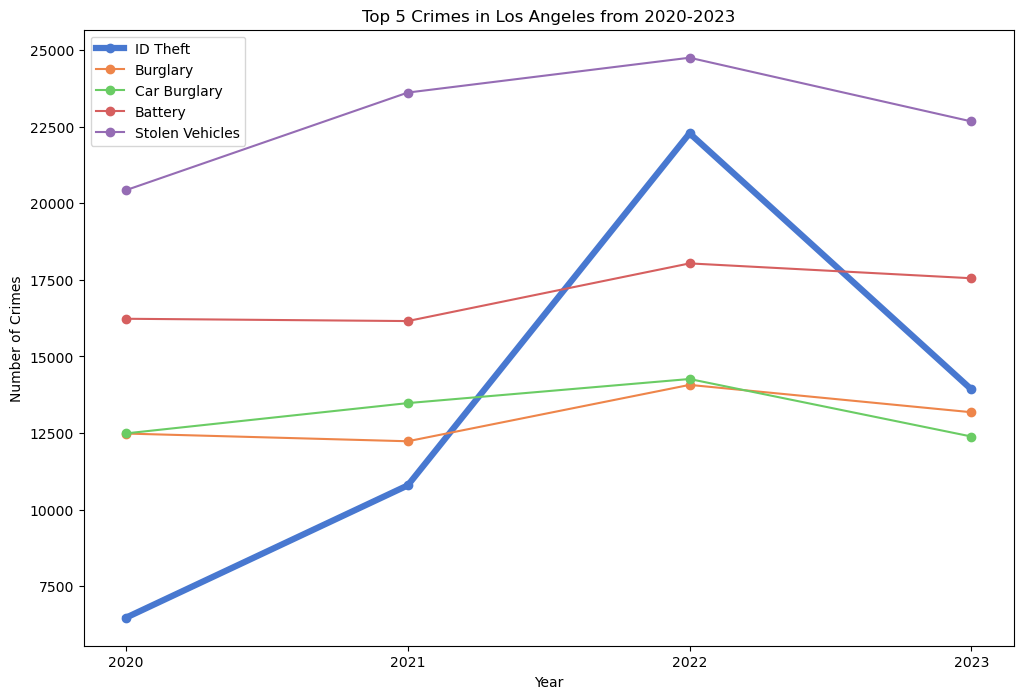

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palettes

# Set a seaborn color palette
sns.set_palette("muted")

# ID Theft Crimes
id_theft = la_data_clean[la_data_clean["Crime Description"] == "THEFT OF IDENTITY"]
id_theft_total = id_theft.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
id_theft_total = id_theft_total.groupby("Year")["Number of Crimes"].sum().reset_index()
id_theft_total = id_theft_total[(id_theft_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.figure(figsize=(12, 8))  # Adjust the values (width, height) as needed

plt.plot(id_theft_total['Year'].astype(int), id_theft_total['Number of Crimes'], 
         marker='o', label='ID Theft', linewidth=4.5)

# Burglary Crimes
burg = la_data_clean[la_data_clean["Crime Description"] == "BURGLARY"]
burg_total = burg.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
burg_total = burg_total.groupby("Year")["Number of Crimes"].sum().reset_index()
burg_total = burg_total[(burg_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.plot(burg_total['Year'].astype(int), burg_total['Number of Crimes'], marker='o', label='Burglary')

# Car Burglary Crimes
car_burg = la_data_clean[la_data_clean["Crime Description"] == "BURGLARY FROM VEHICLE"]
car_burg_total = car_burg.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
car_burg_total = car_burg_total.groupby("Year")["Number of Crimes"].sum().reset_index()
car_burg_total = car_burg_total[(car_burg_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.plot(car_burg_total['Year'].astype(int), car_burg_total['Number of Crimes'], marker='o', label='Car Burglary')

# Assault Crimes
assault = la_data_clean[la_data_clean["Crime Description"] == "BATTERY - SIMPLE ASSAULT"]
assault_total = assault.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
assault_total = assault_total.groupby("Year")["Number of Crimes"].sum().reset_index()
assault_total = assault_total[(assault_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.plot(assault_total['Year'].astype(int), assault_total['Number of Crimes'], marker='o', label='Battery')

# Stolen Car
stolen_car = la_data_clean[la_data_clean["Crime Description"] == "VEHICLE - STOLEN"]
stolen_car_total = stolen_car.groupby(['Year', 'Month']).size().reset_index(name='Number of Crimes')
stolen_car_total = stolen_car_total.groupby("Year")["Number of Crimes"].sum().reset_index()
stolen_car_total = stolen_car_total[(stolen_car_total['Year'].isin([2020, 2021, 2022, 2023]))]
plt.plot(stolen_car_total['Year'].astype(int), stolen_car_total['Number of Crimes'], marker='o', label='Stolen Vehicles')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Top 5 Crimes in Los Angeles from 2020-2023')
plt.legend()  # Add a legend to label the lines
plt.xticks([2020, 2021, 2022, 2023])
plt.show()


In [71]:
id_theft_total

,Year,Number of Crimes
0,2020,6468
1,2021,10789
2,2022,22287
3,2023,13923


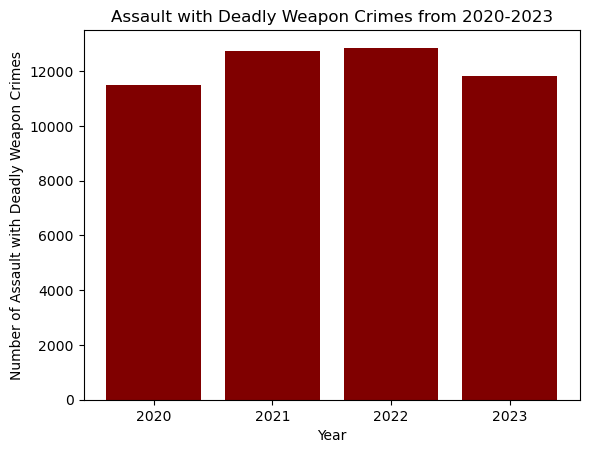

In [42]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to update the bar graph based on the selected crime type
def update_graph():
    selected_crime = crime_var.get()

    if selected_crime == "ASSAULT WITH DEADLY WEAPON":
        data = weapon_assault_total
        title = 'Assault with Deadly Weapon Crimes'
    elif selected_crime == "BURGLARY":
        data = burg_total
        title = 'Burglary Crimes'
    elif selected_crime == "BURGLARY FROM VEHICLE":
        data = car_burg_total
        title = 'Burglary from Vehicle Crimes'
    elif selected_crime == "BATTERY - SIMPLE ASSAULT":
        data = assault_total
        title = 'Battery'
    elif selected_crime == "VEHICLE - STOLEN":
        data = stolen_car_total
        title = 'Stolen Vehicle'    
    else:
        return  # Return if no crime type is selected
        
    ax.clear()
    plt.xticks([2020, 2021, 2022, 2023])
    ax.bar(data['Year'].astype(int), data['Number of Crimes'], color='maroon')
    ax.set_xlabel('Year')
    ax.set_ylabel(f'Number of {title}')
    ax.set_title(f'{title} from 2020-2023')
    canvas.draw()

# Your data processing code here...

# Create the main tkinter window
root = tk.Tk()
root.title("Crime Statistics")

# Dropdown menu for crime selection
crime_var = tk.StringVar()
crime_options = ["ASSAULT WITH DEADLY WEAPON", "BURGLARY",
                 "BURGLARY FROM VEHICLE","BATTERY - SIMPLE ASSAULT",
                "VEHICLE - STOLEN"]
crime_dropdown = ttk.Combobox(root, textvariable=crime_var, values=crime_options)
crime_dropdown.set(crime_options[0])
crime_dropdown.grid(row=0, column=0, padx=10, pady=10)

# Button to update the graph
update_button = tk.Button(root, text="Update Graph", command=update_graph)
update_button.grid(row=0, column=1, padx=10, pady=10)

# Create a matplotlib figure and axis
fig, ax = plt.subplots()
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.grid(row=1, column=0, columnspan=2, padx=10, pady=10)

# Initial plot
update_graph()

# Run the tkinter main loop
root.mainloop()
